# [Implementing Neural Networks with Numpy](https://github.com/SurajDonthi/Neural-Networks-from-Scratch)

## [Part 3: Logistic Regression](https://towardsdatascience.com/neural-networks-with-numpy-for-absolute-beginners-part-3-logistic-regression-18b474096a4e)  

<meta name="description" content="Sigmoid activation function is the most elementaI concept in Neural Networks. In this tutorial, you will learn to implement logistic regrssion which uses the sigmoid activation function for classification with numpy."/>

#### Sigmoid activation function is the most elementaI concept in Neural Networks. In this tutorial, you will learn to implement logistic regrssion which uses the sigmoid activation function for classification with numpy.

In both Machine Learning and Deep Learning, you could encounter two kinds of problems which are regression and classification. In regression problems, you predict a continuous real-value number while in classification problems, you predict different classes of objects.

In the previous tutorials, we went indepth into what a perceptron is and how it learns to predict with the use of linear regression. In this tutorial, you will learn about logistic regression that is used for classification problems.

As before a bit of math will be involved, but I'll ensure to cover from the basics so that you can understand easily.

If you are unsure of which environment to use for implementing the code in this tutorial, I recommend [Google Colab](https://colab.research.google.com/). The environment comes with many important packages already installed. Installing new packages and also importing and exporting the data is quite simple. Most of all, it also comes with GPU support. So go ahead and get coding!

Lastly, I recommend that you go through the first two tutorials before you start this. However, if you already know well about linear regression and a bit about Neural Networks or just want to learn about Logistic Regression, you could start right away!

## Sigmoid Activation Function

One of the earliest and most popular activation functions utlizide is the *Sigmoid* function.

The equation of the sigmoid function is as follows: \begin{equation} f(t) = \frac{1}{1 + e^{-t}} \end{equation} 

<br>and the graph for the function is as below:

<p align="center">
<img src="file://./Images/sigmoid.png" alt="Sigmoid Function" width="500"/>

When $t > 0.5$ the function approximates to $1$ and when $t<0$ the function apprroximates to $0$. Hence through a Sigmoid, we achieve binary classification i.e., either 1 or 0.

Hence, a perceptron with a sigmoid activation function does binary classification on a given set of data. This process of binary classification is popularly called ***Logistic Regression*** . In the next section, we'll dive deeper into *logistic regression* and also understand how the model is trained.

In [1]:
def sigmoid(z):
    z[z > 400] = 400                             # To aviod overflow
    z[z < -400] = -400                           # To avoid underflow
    a = 1 / (1 + np.exp(-z))
    return a

## Logistic Regression

So, what is logistic regression?

Logistic regression is a technique used for binary classification. It creates a decision boundary between datapoints to categorize them in any one of the two classes. Such an illustration can be seen in the figure below. We shall go deeper into understanding and training a *logistic regression* model through a hands-on implementation. Understanding logistic regression will provide the base for understanding a Neural Network model.

<p align="center">
<img src="https://raw.githubusercontent.com/SurajDonthi/Article-Tutorials/master/NN%20with%20Numpy%203/Images/Logistic%20Regression.gif" alt="GIF Image of Logistic Regression" />

The computation graph for logistic regression to be implemented can be shown as in below figure.

<p align="center">
<img src="https://raw.githubusercontent.com/SurajDonthi/Article-Tutorials/master/NN%20with%20Numpy%203/Images/Logistic%20Regression%20Computation%20Graph.png" alt="Perceptron wih Logistic Regression" width=50%/>

We have two inputs $x_1$ and $x_2$ which are multiplied by the weights $w_1$ and $w_2$ respectively. An additional bias $b$ is added to their sum to obtain $z$. The parameters ($w_1$, $w_2$, $b$) are learnt  during gradient descent.

The sum $z$ is passed through the sigmoid activation function to obtain the prediction $y$. The activation function has already been explained earlier.

Now let's get coding!

The first step would be to import the required packages.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
from matplotlib import cm
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
%matplotlib inline

params = {'axes.titlesize': 'xx-large',               # Set title size
          'axes.labelsize': 'x-large',                # Set label size
          'figure.figsize': (8, 6)                    # Set a figure Size
         }

rcParams.update(params)

You'll use the sklearn package to perform two tasks:
1. Generate datasets of blobs
2. Split the data into train and test sets.

You'll use matplotlib for visualizing the results.

Before you start defining code, in any machine learning project your first task will be to define the hyperparameters. The hyperparameters can be the dataset size, the learning rate, number of epochs etc. You must be wondering why these variables are called hyperparameters! You'll find out later that parameters are what is learnt in the model and we use hyperparameter to fine tune the model for achieving better accuracy.

Here we also define the number of input features and the number of clusters as we need to create the dataset.

Go ahead and define them!

In [3]:
# Sample size
M = 500

# No. of input features
n = 2

# Learning Rate
l_r = 0.001

# No. of clusters for creating
clusters = 2

# Number of iterations for updates
epoch = 15

Next we import the dataset from scikit-learn with the make_blobs function which creates blobs of classes. We will visualize the same too.

In [4]:
# Create blobs to create two clusters of data
X, y = make_blobs(n_samples=M, 
                  n_features=n, 
                  centers=clusters, 
                  cluster_std=2)
# Change dimension of y to (n, 1) for performing vector multiplication
y = y.reshape(y.shape[0], 1)

Now lets, plot a graph to visualize the data generated.

In [5]:
# Plot the generated datapoints
def plot_datapoints(X, y):
    # Create a scatterplot of the points 
    _ = plt.scatter(X[:,0], X[:,1], c=np.squeeze(y), cmap=cm.rainbow, alpha=0.5)  
    # Set the title and axes labels
    _ = plt.xlabel('X1')
    _ = plt.ylabel('X2')
    _ = plt.title('Set of datapoints generated')
    plt.show()

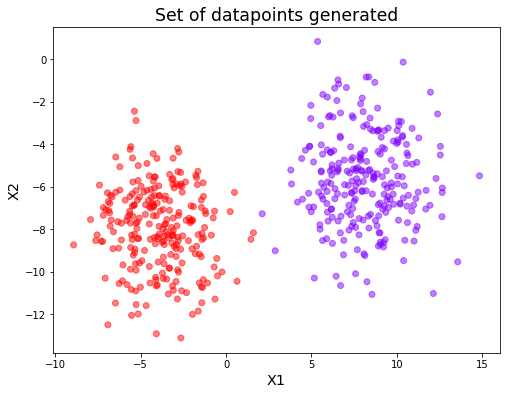

In [6]:
plot_datapoints(X, y)

The two set of datapoints belong to the two classes. Our goal is to find an optimal decision boundary that separates these two classes.

The next step will be to split the data into train set and test set. We do this so that we can verify the accuracy of he learned algorithm.

In [7]:
def split_data(X,y, test_size=0.2):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    # Print the shape of the split datasets
    print('Shape of X_train', X_train.shape) 
    print('Shape of y_train', y_train.shape)
    print('Shape of X_test', X_test.shape)
    print('Shape of y_test', y_test.shape)
    return X_train, X_test, y_train, y_test

In [8]:
X_train, X_test, y_train, y_test = split_data(X,y)

Shape of X_train (400, 2)
Shape of y_train (400, 1)
Shape of X_test (100, 2)
Shape of y_test (100, 1)


You'll now randomly initialize the parameters W and b, which are learned during training.

In [9]:
def init_params():
    # Randomly initialize the parameters 
    W = np.random.randn(2, 1)
    b = np.random.randn()
    print('Initializing weights...')
    print('W: ', W)
    print('b: ', b)
    return W, b

In [10]:
W, b = init_params()

Initializing weights...
W:  [[-1.30066269]
 [-1.33928384]]
b:  -0.9160473109495246


After we have randomly initialized the parameters, the next step is to perform forward propagation and see how the network predicts.

In [11]:
def forward_prop(X, W, b):
    # Multiply by W and add bias
    z = X.dot(W) + b
    # Pass through activation function
    a = sigmoid(z)
    return a

In [12]:
y_pred = forward_prop(X_train, W, b)

Now, given $w$ & $b$, we can plot a contour region over the set of generated train set. A contour region represents the different areas separated by the decision boundary.

In [13]:
# Create a meshgrid that will be classified into either of the classes at each point
def generate_mesh_grid(X, W, b):
    # Generate a set of datapoints on x1 for creating a mesh.
    x1min, x1max = min(X[:, 0])-1, max(X[:, 0])+1
    # Generate a set of datapoints on x2 for creating a mesh.
    x2min, x2max = min(X[:, 1])-1, max(X[:, 1])+1
    # Increment value for creating the meshgrid
    h = 0.05
    # Generate the two coordinate mesh
    xx1, xx2 = np.meshgrid(np.arange(x1min, x1max, h), np.arange(x2min, x2max, h))
    # Reshape to one dimension for prediction
    x_mesh = np.c_[xx1.ravel(), xx2.ravel()]
    # Classify the data points
    a_mesh = forward_prop(x_mesh, W, b)
    # Reshape back to original dimensions
    a_mesh = a_mesh.reshape(xx1.shape)
    # Round the values to 0 or 1 based on threshold 0.5
    a_mesh = (a_mesh >= 0.5) * 1
    return xx1, xx2, a_mesh

In [14]:
xx1, xx2, a_mesh = generate_mesh_grid(X_train, W, b)

You will now utilize the `generate_mesh_grid` function to plot the dataset along with the contour.

In [15]:
def plot_data_with_contour(X, y, W, b):
    # Generate mesh grid
    xx1, xx2, a_mesh = generate_mesh_grid(X, W, b)
    # Create a contour plot
    _ = plt.contourf(xx1, xx2, a_mesh, cmap=cm.rainbow, alpha=0.5)
    # Create a scatter plot
    _ = plt.scatter(X[:,0], X[:,1], c=np.squeeze(y), cmap=cm.rainbow, alpha=0.5)
    # Set the title and axes labels
    _ = plt.title('Plot of predicted decision boundary on set of Datapoints')
    _ = plt.xlabel('X1')
    _ = plt.ylabel('X2')
    plt.show()

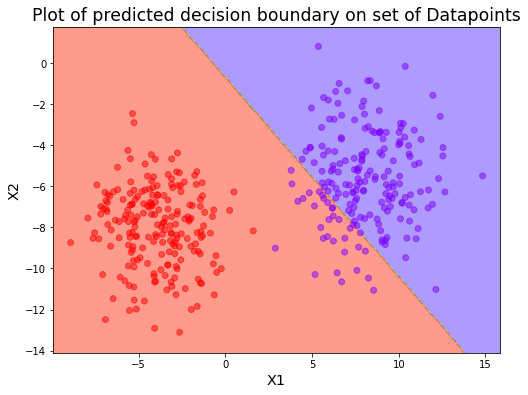

In [16]:
plot_data_with_contour(X_train, y_train, W, b)

It's now time to define the loss function!!

## Cost/Loss Function

Unlike the MSE for Linear Regression,here we use a logistic loss function. This is because when we pass the sum $z$ through a sigmoid activation function, the output is non-linear (as sigmoid function is non-linear). This results in an error that is non-convex.

But what do we mean by non-convex?

In unsophisticated terms, the non-convex function appears to be like the graph on the right.

In such situations, while our goal is to find the minimal point, it becomes extremely difficult to find one because of the troughs and crests. Instead we could make our problem simpler if we could just have a simple function (like the one on the left) where we can easily find the minimum point. This is the convex function on the left.

Hence, we use a log function that actually converts the non-linear function back to a linear one, which in turn results in a convex function!

<p align="center">
<img src="https://raw.githubusercontent.com/SurajDonthi/Article-Tutorials/master/NN%20with%20Numpy%203/Images/convex_cost_function.jpg" alt="Convex and Non-convex" width=70%/>


The Loss can be defined as:
\begin{equation}
l = 
\begin{cases}
-\log(y'),& \text{if } y = 1\\
-\log(1-y'),& \text{if } y = 0\\
\end{cases}
\end{equation}

 <p align="center">
<img src="https://raw.githubusercontent.com/SurajDonthi/Article-Tutorials/master/NN%20with%20Numpy%203/Images/Negative%20Log%20Function.png" width="500" alt="Negative Log Function"/>

The graph of $-\log (x)$ is shown in the above figure. 
You can infer that given $y = 1$ if $y' \rightarrow 1$, then $loss \rightarrow 0$ and when $y' \rightarrow 0$, then $loss \rightarrow \infty$.
Similarly, if $y' \rightarrow 0$, then $loss \rightarrow 0$ and when $y' \rightarrow 1$, then $loss \rightarrow \infty$ given $y = 0$.
It implies that when the prediction is wrong, the parameters are heavily penalized and when the prediction is right, the parameters are not penalized.

For the purpose of computation, you'll have to define a single function that can perform both cases when $y=1$ and  $y=0$. Therefore, we can reduce the function as below:

\begin{equation}
L = -\Big[y.\log(y') + (1-y).\log(1-y')\Big]
\end{equation}

Here, the function reduces to $\log(y')$ when $y=1$ and $\log(1-y')$ when $y=0$ just as we had defined earlier.

While the above is only the error for only one example (datapoint), we need to account for all the examples. Therefore, we find the mean of the errors by summing all of them and dividing by the number of examples as below.
\begin{equation}
(Cost/Loss \space fn.)L = 
-\frac{1}{M} \sum_{i=0}^M\Big(y.\log(y') + (1-y).\log(1-y')\Big)
\end{equation}

The code for this would be as below:

In [17]:
def compute_loss(y_pred, y_train):
    y_pred[y_pred <= 0] = 0.0000001                   # to avoid overflow and underflow
    y_pred_neg = 1 - y_pred
    y_pred_neg[y_pred_neg <= 0] = 0.0000001           # to avoid overflow and underflow
    # Loss function
    loss = - np.mean(y_train * np.log(y_pred) + (1 - y_train) * np.log(y_pred_neg))
    return loss

In [18]:
loss = compute_loss(y_pred, y_train)
loss

0.214890949844341

Let's plot the loss. You'll keep track of the losses for all the iterations (epochs) after which you will be able to visualize the decrease in error.

In [19]:
def plot_loss(losses):
    # Plot of the loss function
    plt.plot(np.arange(len(losses)), losses, marker='o')
    # Set title and labels
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss')
    plt.show()

In [20]:
# Initialize a list for holding loss values
losses = []

# Append the loss
losses.append(loss)

losses

[0.214890949844341]

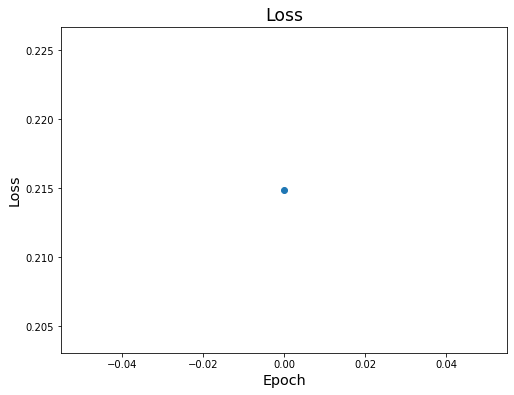

In [21]:
plot_loss(losses)

## Gradient Descent

This will usually be the toughest part to understand but I have put in very easy terms.

Gradient descent in layman words is like walking down a hill. This hill refers to the error in our case. So as you walk down the hill, the error ($Loss$) goes down. Therefore, our goal is to walk down to the point of least error. Now you must observe that you need to tweak the parameters $W$ and $b$ in order to decrease the $Loss$. Hence, we find the derivative with respect to the parameters and update the parameters accordingly. You'll understand how this works in detail next.

The gradient descent algorithm is very similar to what we had used for linear regression. As in the below figure, you can observe that there is a parameter $p$ which is adjusted so as to find the minimum value of $Loss$.

But, how can we adjust the value of $p$ so that I get the least $loss$?

Well, that's simple! Just find its derivative or the slope. Mathematically, the slope is $zero$ at the minimal point(minima) [You can refer to this wondeful [Khan Academy video](https://www.khanacademy.org/math/ap-calculus-ab/ab-differentiation-1-new/ab-2-1/v/derivative-as-slope-of-curve) if you do not know about derivatives and the slope.] and if you observe keenly, the slope is negative on the left of minima and positive on the right of minima. And when $p$ is to the left of minima, we need to add some value so that it moves towards optimal $p$ and when $p$ is to the right subtract some value.

So all we need to do is to subtract the slope! When the slope is $-ve$ add some value (like the slope!) and when the slope is $+ve$ subtract some value (slope again!). Moreover, as we edge towards the minima the slope too reduces which is very beneficial as we need to take tinier steps.

<p align="center">
<img src="https://raw.githubusercontent.com/SurajDonthi/Article-Tutorials/master/NN%20with%20Numpy%203/Images/Gradient%20Descent.gif" alt="Gradient Descent GIF">

We find the derivative of the $Loss$ with respect to $W$ and $b$ in our case.

The resulting derivatives w.r.t $W$ and $b$ would be:

\begin{equation}
\frac{\partial{L}}{\partial{z}}  = y' - y \\
\frac{\partial{L}}{\partial{W}} = \frac{\partial{L}}{\partial{z}} . \frac{\partial z}{\partial W} \qquad [By \ Chain \ Rule]\\
\implies \partial W = x. (y' - y) \qquad [\because z = W.X + b]\\
\frac{\partial{L}}{\partial{b}} = \frac{\partial{L}}{\partial{z}} . \frac{\partial z}{\partial b} \qquad [By \ Chain \ Rule]\\
\implies \partial b = (y' - y)
\end{equation}

I've skipped a few steps which are unnecessary, but if interested, you can refer to this [video](https://youtu.be/hWLdFMccpTY?t=225).

#### Updating the parameters

As to the last part of updating the parameters, with the slopes, we multiply the slope by a dampening factor $\alpha$ so that the parameters don't overshoot when having very high error.


\begin{equation}
\qquad m = m - \alpha . \partial{m} \\
\quad\space\space b = b - \alpha . \partial{b}
\end{equation}

You'll now implement the same `gradient_descent` algorithm as below.

In [22]:
def grad_desc(m, b, X_train, y_train, y_pred, l_r=0.005):
    
    dm = X_train.T.dot(y_pred - y_train)
    db = np.mean(y_pred - y_train, axis=0, keepdims=True)
    m -= l_r * dm
    b -= l_r * db
    return m, b

In [23]:
W, b = grad_desc(W, b, X_train, y_train, y_pred, l_r=0.005)

Now there's one last thing to do i.e., update combine both the plot functions into one.

In [24]:
# Update function to pass the axes
def plot_data_with_contour(ax, X, y, W, b):
    xx1, xx2, a_mesh = generate_mesh_grid(X, W, b)
    _ = ax.contourf(xx1, xx2, a_mesh, cmap=cm.rainbow, alpha=0.5)
    _ = ax.scatter(X[:,0], X[:,1], c=np.squeeze(y), cmap=cm.rainbow, alpha=0.5)
    _ = ax.set_title('Plot of predicted decision boundary on set of Datapoints')
    _ = ax.set_xlabel('X1')
    _ = ax.set_ylabel('X2')
    return ax

In [25]:
# Combined plot function to plot both Scatter plot with decision Boundary as well as the loss
def plot_graphs(dataset, params=None, losses=None, iteration=0):
    # If loss is None no. of plots = 2 otherwise 1
    plots = 2 if losses!=None else 1
    fig = plt.figure(figsize=(8 * plots, 6))
    X, y = dataset['X'], dataset['y']
    ax1 = fig.add_subplot(1, plots, 1)    
    # If params is not None, plot contour
    if params is not None:
        # Plot the randomly generated line
        ax1 = plot_data_with_contour(ax1, X, y, params['W'], params['b'])
        ax1.set_title('Predicted decision boundary on set of Datapoints, epoch=' + str(iteration))
    # Else if params is None, plot only contour
    else:
        ax1.scatter(X[:,0], X[:,1], c=np.squeeze(y), cmap=cm.rainbow, alpha=0.5)
        ax1.set_title('Plot of Datapoints generated')
    ax1.set_xlabel('x')
    ax1.set_ylabel('y')
    # Plot Loss if losses is not None
    if(losses!=None):
        ax2 = fig.add_subplot(1, plots, 2)
        ax2.plot(np.arange(len(losses)), losses, marker='o')
        ax2.set_xlabel('Epoch')
        ax2.set_ylabel('Loss')
        ax2.set_title('Loss')
    plt.show()

In [26]:
dataset = {'X': X_train, 'y': y_train}
params = {'W': W, 'b': b}

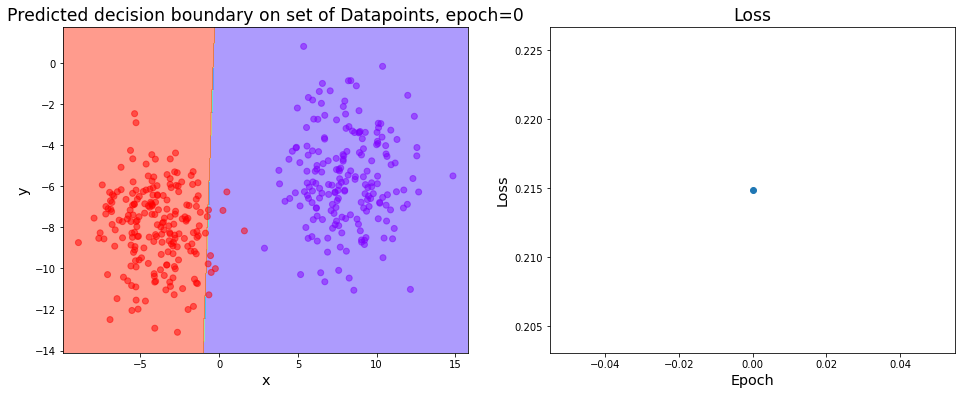

In [27]:
plot_graphs(dataset, params, losses)

We have obtained a beautiful plot of the decision boundary as well as the Loss.


Now as your final task, let's put together everything you had done until now and see the results for yourselves.


So you will first define the hyperparameters. You can play around with these values especially the learning rate `l_r` and `epoch` to observe how the model learns to predict.

In [28]:
# Sample size
M = 500

# No. of input features
n = 2

# Learning Rate
l_r = 0.0002

# No. of clusters for creating
clusters = 2

# Number of iterations for updates
epoch = 26

Now, you can write the code from creating a dataset to training your logistic regression model in a single go as below.

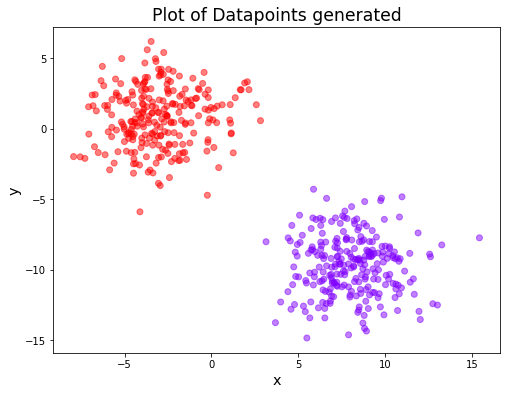

Shape of X_train (400, 2)
Shape of y_train (400, 1)
Shape of X_test (100, 2)
Shape of y_test (100, 1)
Initializing weights...
W:  [[ 2.54030992]
 [-1.34166907]]
b:  0.5479294979006469
------------------------------------------------------------------------------------
Iteration: 0
W =  [[ 2.54030992]
 [-1.34166907]]
b =  0.5479294979006469
Loss =  17.580543959068596


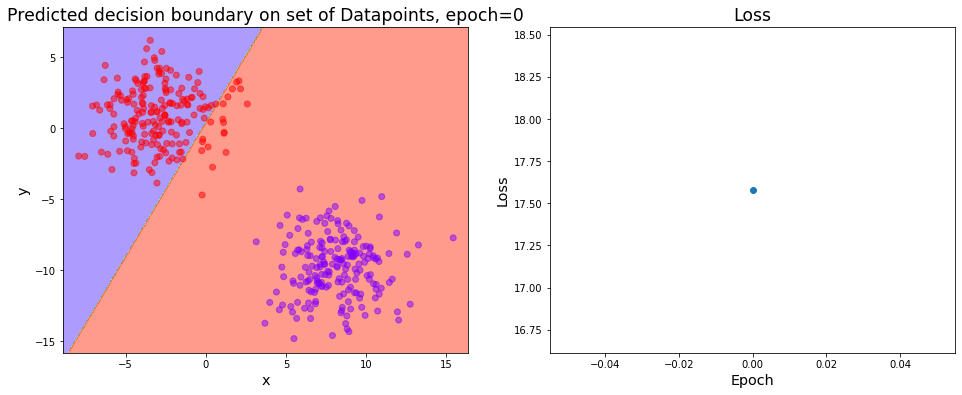

------------------------------------------------------------------------------------
Iteration: 5
W =  [[0.37396349]
 [0.71733751]]
b =  [[0.54786868]]
Loss =  0.5151578181695393


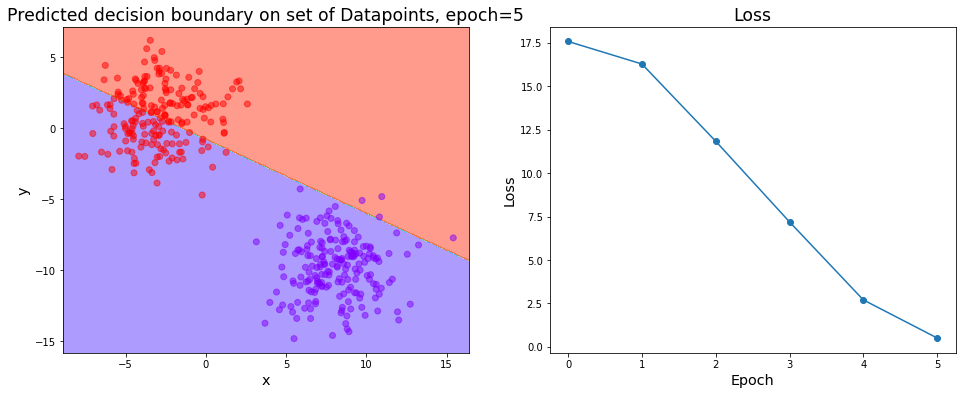

------------------------------------------------------------------------------------
Iteration: 10
W =  [[0.04363764]
 [0.72956592]]
b =  [[0.54805631]]
Loss =  0.24705134287276778


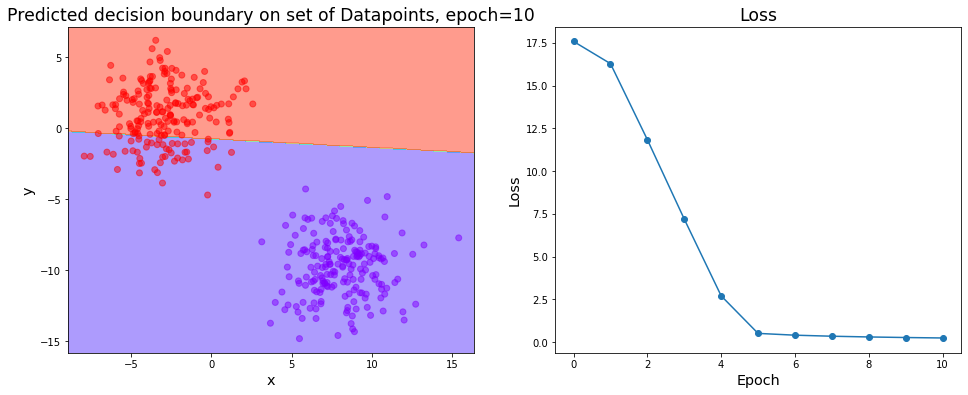

------------------------------------------------------------------------------------
Iteration: 15
W =  [[-0.13293857]
 [ 0.69594768]]
b =  [[0.54819657]]
Loss =  0.16839599831224458


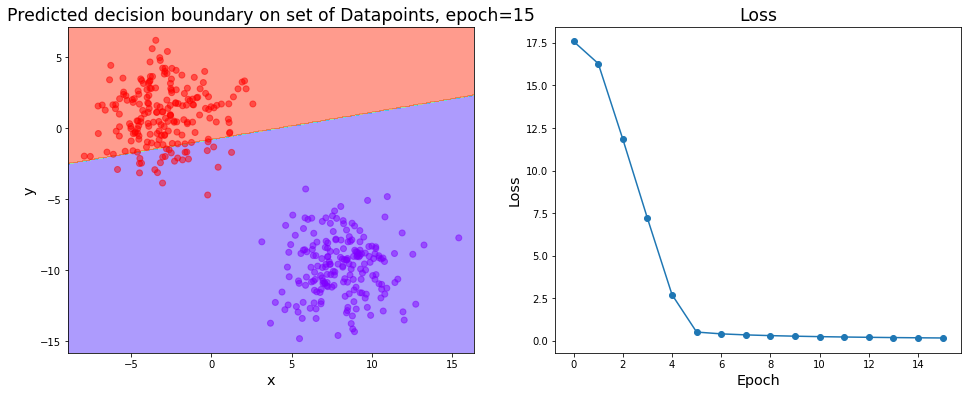

------------------------------------------------------------------------------------
Iteration: 20
W =  [[-0.25104941]
 [ 0.66473985]]
b =  [[0.54830707]]
Loss =  0.13195397215845556


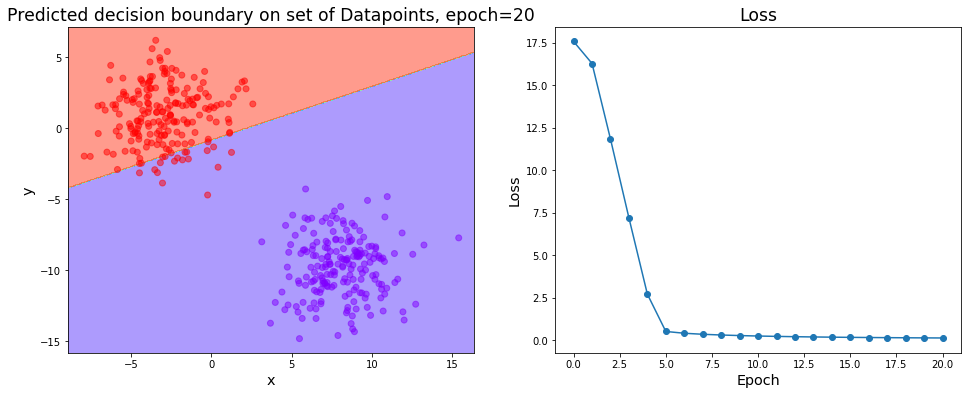

------------------------------------------------------------------------------------
Iteration: 25
W =  [[-0.33719714]
 [ 0.63841904]]
b =  [[0.54840019]]
Loss =  0.11207455624748039


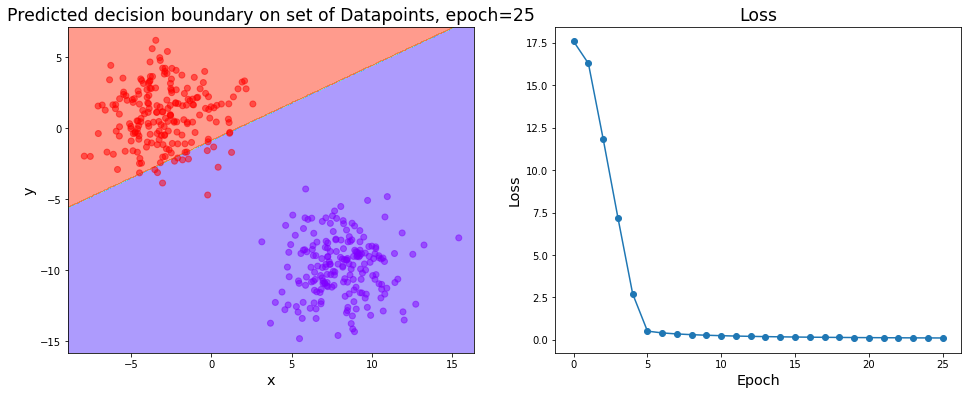

In [29]:
# Create Data
X, y = make_blobs(n_samples=M, 
                  n_features=n, 
                  centers=clusters, 
                  cluster_std=2)
y = y.reshape((y.shape[0], 1))

# Visualize the data
plot_graphs({'X': X, 'y': y})

# Split the data
X_train, X_test, y_train, y_test = split_data(X,y)

# Initialize the weights
W, b = init_params()

# Initialise loss
losses = []

params = {'W': W, 'b': b}
dataset = {'X': X_train, 'y': y_train}

for i in range(epoch):
    
    # Print Iteration
    if(i%5==0): 
        print('------------------------------------------------------------------------------------')
        print('Iteration:', i)
        print('W = ', W)
        print('b = ', b)
    
    # Output Logits for the weights
    y_pred = forward_prop(X_train, W, b)
    
    # Compute the loss
    loss = compute_loss(y_pred, y_train)
    losses.append(loss)
    
    # Visualize the plots
    if(i%5==0): 
        print('Loss = ', loss)
        plot_graphs(dataset, params, losses, i)
    
    # Update Weights with Gradient Descent
    W, b = grad_desc(W, b, X_train, y_train, y_pred, l_r=l_r)
    params['W'], params['b'] = W, b

del losses[:]

### Prediction

We had earlier created a test dataset, you'll now test your regression model against it and determine the accuracy.

The formula for accuracy is:

\begin{equation}
Accuracy = 100 - \frac{Sum \ of \ Error}{No. \ of \ examples} * 100
\end{equation}

Prediction: 
Loss =  0.13115287611853477
Accuracy = 94.0%


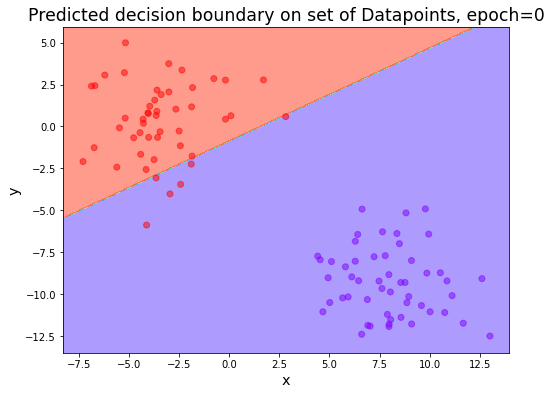

Hence 
W =  [[-0.351842  ]
 [ 0.63368749]]
b =  [[0.54841737]]


In [30]:
# Prediction
print('Prediction: ')

# Forward Propagation
y_pred = forward_prop(X_test, W, b)

# Compute Loss
loss = compute_loss(y_pred, y_test)
print('Loss = ', loss)

# Compute Accuracy
accuracy = 100 - np.mean(np.fabs(np.round(y_pred) - y_test)) * 100
print('Accuracy = {}%'.format(round(accuracy, 4)))

# Plot the Contour Graph
plot_graphs({'X': X_test, 'y': y_test}, {'W': W, 'b': b})

# Print the optimal values of m and b
print('Hence \nW = ', W)
print('b = ', b)

### Conclusion

In this tutorial, you learnt

1. Sigmoid Activation Function

2. Creating a Logistic Regression Model

3. Training you Logistic Regression Model

In the next tutorial, you'll learn to implement Neural Networks from scratch using only Numpy!